In [1]:
# Importing  necssary libraries 

import pandas as pd
from pylab import *
import numpy as np
from matplotlib import dates
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pylab
import sys
import matplotlib.dates as mdates
from glob import glob

### Analysis for Weather station LTRM4 ###

In [2]:
# Reading data of station LTRM4 (from 2007 till 2019) and creating data frames
# the output is a list of data frames
# Using glob() method to read multiple files at once - the raw data is hourly for every year

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Weather data/LTRM4/LTRM4*.txt')
dataframes_ltrm4 = [pd.read_csv(f, delim_whitespace = True, header = 0, skiprows = 1,
                          dtype={'#yr': object, 'mo': object, 'dy': object, 'hr': object, 'mn': object}) 
              for f in filenames]

In [3]:
# Assigning the column names to all dataframes

for i in range(0, len(dataframes_ltrm4)):
    dataframes_ltrm4[i].columns = ['YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 
                                   'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']

In [4]:
# Concatenating the list of dataframes to form a single dataframe

df_ltrm4 = pd.concat(dataframes_ltrm4, sort = False)

In [5]:
# Checking the data in the concatenated dataframe

df_ltrm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2007,01,01,00,00,122,7.4,10.8,99.0,99.0,99.0,999,9999.0,999.0,999.0,999.0,99.0,99.0
1,2007,01,01,00,06,120,6.5,9.5,99.0,99.0,99.0,999,9999.0,999.0,999.0,999.0,99.0,99.0
2,2007,01,01,00,12,114,5.8,8.1,99.0,99.0,99.0,999,9999.0,999.0,999.0,999.0,99.0,99.0
3,2007,01,01,00,18,126,6.5,10.1,99.0,99.0,99.0,999,9999.0,999.0,999.0,999.0,99.0,99.0
4,2007,01,01,00,24,120,6.2,10.1,99.0,99.0,99.0,999,9999.0,999.0,999.0,999.0,99.0,99.0


In [6]:
df_ltrm4.tail()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
84563,2020,12,31,23,30,217,3.3,5.6,99.0,99.0,99.0,999,1023.5,-2.5,999.0,-7.7,99.0,99.0
84564,2020,12,31,23,36,224,3.1,4.7,99.0,99.0,99.0,999,1023.8,-2.5,999.0,-7.6,99.0,99.0
84565,2020,12,31,23,42,223,2.9,4.0,99.0,99.0,99.0,999,1024.0,-2.6,999.0,-7.6,99.0,99.0
84566,2020,12,31,23,48,230,3.6,4.9,99.0,99.0,99.0,999,1024.2,-2.6,999.0,-7.7,99.0,99.0
84567,2020,12,31,23,54,234,3.7,5.2,99.0,99.0,99.0,999,1024.2,-2.6,999.0,-7.7,99.0,99.0


### 2. Explaratory Data Analysis - LTRM4

In [7]:
#Checking the information of the dataframe
df_ltrm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198444 entries, 0 to 84567
Data columns (total 18 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   YY      1198444 non-null  object 
 1   MM      1198444 non-null  object 
 2   DD      1198444 non-null  object 
 3   hh      1198444 non-null  object 
 4   mm      1198444 non-null  object 
 5   WDIR    1198444 non-null  int64  
 6   WSPD    1198444 non-null  float64
 7   GST     1198444 non-null  float64
 8   WVHT    1198444 non-null  float64
 9   DPD     1198444 non-null  float64
 10  APD     1198444 non-null  float64
 11  MWD     1198444 non-null  int64  
 12  PRES    1198444 non-null  float64
 13  ATMP    1198444 non-null  float64
 14  WTMP    1198444 non-null  float64
 15  DEWP    1198444 non-null  float64
 16  VIS     1198444 non-null  float64
 17  TIDE    1198444 non-null  float64
dtypes: float64(11), int64(2), object(5)
memory usage: 173.7+ MB


In [8]:
# Displaying the distribution of all numerical variables

df_ltrm4.describe()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,1.198444e+06,1.198444e+06,1.198444e+06,1198444.0,1198444.0,1198444.0,1198444.0,1.198444e+06,1.198444e+06,1.198444e+06,1.198444e+06,1198444.0,1198444.0
mean,2.019147e+02,5.015613e+00,8.422433e+00,99.0,99.0,99.0,999.0,5.321733e+03,4.904004e+02,9.055622e+02,7.821626e+02,99.0,99.0
std,1.421314e+02,1.300935e+01,1.858336e+01,0.0,0.0,0.0,0.0,4.488312e+03,4.967879e+02,2.891009e+02,4.115889e+02,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,99.0,99.0,99.0,999.0,9.757000e+02,-3.540000e+01,3.100000e+00,-4.010000e+01,99.0,99.0
25%,1.070000e+02,1.500000e+00,2.300000e+00,99.0,99.0,99.0,999.0,1.014600e+03,5.000000e+00,9.990000e+02,9.990000e+02,99.0,99.0
50%,1.810000e+02,2.900000e+00,4.300000e+00,99.0,99.0,99.0,999.0,1.028800e+03,2.430000e+01,9.990000e+02,9.990000e+02,99.0,99.0
75%,2.930000e+02,4.700000e+00,7.000000e+00,99.0,99.0,99.0,999.0,9.999000e+03,9.990000e+02,9.990000e+02,9.990000e+02,99.0,99.0
max,9.990000e+02,9.900000e+01,9.900000e+01,99.0,99.0,99.0,999.0,9.999000e+03,9.990000e+02,9.990000e+02,9.990000e+02,99.0,99.0


In [9]:
# Replacing bad data/missing values(99, 999 and 9999...) by NaN 
df_ltrm4.replace(99,np.nan,inplace=True)
df_ltrm4.replace(999,np.nan,inplace=True)
df_ltrm4.replace(99.0,np.nan,inplace=True)
df_ltrm4.replace(999.0,np.nan,inplace=True)
df_ltrm4.replace(9999.0,np.nan,inplace=True)

In [10]:
# Combining 'YY', 'MM', 'DD', 'hh' and 'mm' features to form a Pandas datetime feature

df_ltrm4["dateTime"] = df_ltrm4["YY"].astype(str) + df_ltrm4["MM"].astype(str) + df_ltrm4["DD"].astype(str) + df_ltrm4["hh"].astype(str) + df_ltrm4["mm"].astype(str)
# convert the datetime to a list
dfList = df_ltrm4["dateTime"].tolist()
# create a new empty list to hold true datetime values
dateList = []
# run datetime function
for d in dfList:
    dates = datetime.strptime(d, '%Y%m%d%H%M')
    dateList.append(dates)
#a = ["YYMMDDhhmm"]
#dateListnew = a + dateList
# add the list as a new column to the dataframe
df_ltrm4["dateTime"] = dateList

In [11]:
df_ltrm4.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,2007,01,01,00,00,122.0,7.4,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,2007,01,01,00,06,120.0,6.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,2007,01,01,00,12,114.0,5.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,2007,01,01,00,18,126.0,6.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,2007,01,01,00,24,120.0,6.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [12]:
# Dropping YY,MM,DD,hh,mm columns since we have the datetime feature

df_ltrm4 = df_ltrm4.drop(['YY', 'MM', 'DD', 'hh', 'mm'], axis = 1)
df_ltrm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,dateTime
0,122.0,7.4,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:00:00
1,120.0,6.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:06:00
2,114.0,5.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:12:00
3,126.0,6.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:18:00
4,120.0,6.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:24:00


In [13]:
# Setting the dateTime feature as an index

df_ltrm4 = df_ltrm4.set_index(['dateTime'])
df_ltrm4.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,122.0,7.4,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:06:00,120.0,6.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:12:00,114.0,5.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:18:00,126.0,6.5,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-01 00:24:00,120.0,6.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Grouping the data at a daily level since the current observations are at a 6 minute interval
# Every record contains the mean value for the day across all years

df_ltrm4_d = df_ltrm4.resample('D').mean()
df_ltrm4_clim = df_ltrm4_d.groupby(df_ltrm4_d.index.dayofyear).mean()
df_ltrm4_clim.index = pd.to_datetime(df_ltrm4_clim.index,format='%j')

In [15]:
print(df_ltrm4_d.shape)
print(df_ltrm4_clim.shape)

(5114, 13)
(366, 13)


In [16]:
#Checking the mising data in the dataframe
#"True" indicates missing value and "False" indicates no missing values
missing_data = df_ltrm4.isnull()
missing_data.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
dateTime,,,,,,,,,,,,,
2007-01-01 00:00:00,False,False,False,True,True,True,True,True,True,True,True,True,True
2007-01-01 00:06:00,False,False,False,True,True,True,True,True,True,True,True,True,True
2007-01-01 00:12:00,False,False,False,True,True,True,True,True,True,True,True,True,True
2007-01-01 00:18:00,False,False,False,True,True,True,True,True,True,True,True,True,True
2007-01-01 00:24:00,False,False,False,True,True,True,True,True,True,True,True,True,True


In [17]:
#counting the missing values in all features.
#True indicates missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

WDIR
False    1176121
True       22323
Name: WDIR, dtype: int64

WSPD
False    1176552
True       21892
Name: WSPD, dtype: int64

GST
False    1151302
True       47142
Name: GST, dtype: int64

WVHT
True    1198444
Name: WVHT, dtype: int64

DPD
True    1198444
Name: DPD, dtype: int64

APD
True    1198444
Name: APD, dtype: int64

MWD
True    1198444
Name: MWD, dtype: int64

PRES
False    623472
True     574972
Name: PRES, dtype: int64

ATMP
False    613380
True     585064
Name: ATMP, dtype: int64

WTMP
True     1085094
False     113350
Name: WTMP, dtype: int64

DEWP
True     938051
False    260393
Name: DEWP, dtype: int64

VIS
True    1198444
Name: VIS, dtype: int64

TIDE
True    1198444
Name: TIDE, dtype: int64



In [18]:
# Dropping the features with mostly missing values 

df_ltrm4_d = df_ltrm4_d.drop(['WVHT', 'DPD', 'APD', 'MWD', 'WTMP', 'DEWP', 'VIS', 'TIDE'], axis = 1)

In [19]:
# Reading the Ice data using glob package into a list of dataframes
# Raw data has Ice cover values for the 4 stations and mean ice coverage from years 2004 to 2020
# the output is a list of dataframes

filenames = glob('C:/Users/sdavedu/Desktop/XGBoost/Ice data/timeseries*.xlsx')
dataframes_ice = [pd.read_excel(f, index_col = 0, header = 0) for f in filenames]

In [20]:
#Concatenating the dataframes into a single dataframe
df_ice_ltrm4 = pd.concat(dataframes_ice, sort = False)
df_ice_ltrm4.head()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [21]:
df_ice_ltrm4.tail()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
date,,,,,
2020-05-19,0.0,0.0,0.0,0.0,0.0
2020-05-20,0.0,0.0,0.0,0.0,0.0
2020-05-21,0.0,0.0,0.0,0.0,0.0
2020-05-22,0.0,0.0,0.0,0.0,0.0
2020-05-23,0.0,0.0,0.0,0.0,0.0


In [22]:
df_ice_ltrm4.describe()

,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,44.424263,44.648016,46.084694,46.439591,33.109071
std,43.082660,46.133818,46.444855,47.192298,43.198345
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.250244,19.996639,19.996639,19.996639,0.000000
75%,93.285090,99.998466,99.998466,99.998466,89.996338
max,99.998464,99.998466,99.998466,99.998466,99.998466


In [23]:
# Retaining just the Ice cover of the station ltrm4 from the ice dataframe i.e. retaining only "LTRM" column

df_ice_ltrm4 = df_ice_ltrm4.drop(['mean_icecoverage', 'DTLM', 'SWPM', 'WNEM'], axis = 1)

In [24]:
# Merging the weather station dataframe with the ice dataframe

df_merge = pd.merge(df_ltrm4_d, df_ice_ltrm4, how = 'inner', left_index = True, right_index = True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,LTRM
2007-01-01,209.893617,5.249367,7.333475,NaN,NaN,10.002140
2007-01-02,247.326360,3.010042,4.568201,NaN,NaN,8.003235
2007-01-03,204.046610,3.019915,4.954894,NaN,NaN,7.003784
2007-01-04,181.141667,2.611667,3.934583,NaN,NaN,4.997253
2007-01-05,201.916667,1.951250,2.729167,NaN,NaN,3.997803


In [25]:
df_merge.tail()

,WDIR,WSPD,GST,PRES,ATMP,LTRM
2020-05-19,107.786957,5.212069,7.107328,1023.089823,15.078802,0.0
2020-05-20,154.599138,3.049785,4.243777,1024.823009,14.194521,0.0
2020-05-21,148.555556,2.803404,3.502553,1022.709735,13.393578,0.0
2020-05-22,144.343478,2.291845,2.855794,1018.202232,15.812558,0.0
2020-05-23,147.146018,2.733186,3.405310,1016.124107,17.206075,0.0


In [26]:
#In addition to the numeric values, WDIR - wind direction has the direction labels as well. i.e. North-West, South etc.
#Analysing these directions here

def label_wdir(data):
    if data['WDIR'] == 0.0 :
        return 'North'
    if data['WDIR'] == 90.0 :
        return 'East'
    if data['WDIR'] == 180.0 :
        return 'South'
    if data['WDIR'] == 270.0 :
        return 'West'
    if 0 < data['WDIR'] < 90 :
        return 'North-East'
    if 90 < data['WDIR'] < 180 :
        return 'South-East'
    if 180 < data['WDIR'] < 270 :
        return 'South-West'
    if 270 < data['WDIR'] < 360 :
        return 'North-West'
    return 'Unknown'
df_merge['Direction'] = df_merge.apply(lambda data: label_wdir(data), axis = 1)

In [27]:
df_merge['Direction'].value_counts()

South-East    1503
South-West    1200
North-West     468
North-East     116
Unknown          6
Name: Direction, dtype: int64

In [28]:
df_merge = df_merge[df_merge['Direction'] != 'Unknown']

In [29]:
#Breaking WDIR into degrees in specific directions 

def wind_magnitude(data) :
    if 90 < data['WDIR'] < 180:
        return data['WDIR']-90
    if 180 < data['WDIR'] < 270:
        return data['WDIR']-180
    if 270 < data['WDIR'] < 360:
        return data['WDIR']-270
    return data['WDIR']

df_merge['WDIR_New'] = df_merge.apply(lambda data: wind_magnitude(data), axis = 1)

df_merge['WDIR_New'].describe()

count    3287.000000
mean       43.299581
std        25.118171
min         0.037657
25%        22.768750
50%        41.461187
75%        64.054868
max        89.945833
Name: WDIR_New, dtype: float64

In [30]:
df_merge = pd.get_dummies(df_merge, prefix=['Wind'], columns = ['Direction'], drop_first=True)
df_merge.head()

,WDIR,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,209.893617,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1
2007-01-02,247.326360,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1
2007-01-03,204.046610,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1
2007-01-04,181.141667,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1
2007-01-05,201.916667,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1


In [31]:
df_merge = df_merge.drop(['WDIR'], axis = 1)
df_merge.head()

,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1


In [32]:
df_merge.shape

(3287, 9)

#### 3. XGBoost Model development  LTRM4

In [33]:
######### Creating lags and moving averages for Ice cover (LTRM) and Air Temperature(ATMP) features ################

for i in range(1,6):
    col = 'ATMP_lag_' + str(i)
    df_merge[col] = df_merge['ATMP'].shift(i)

for i in range(1,6):
    col = 'Ice_lag_' + str(i)
    df_merge[col] = df_merge['LTRM'].shift(i)

for i in range(3,6):
    col = 'ATMP_RM_' + str(i)
    df_merge[col] = df_merge['ATMP'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

for i in range(3,6):
    col = 'Ice_RM_' + str(i)
    df_merge[col] = df_merge['LTRM'].rolling(i).mean()
    df_merge[col] = df_merge[col].shift(1)

df_merge.head()

,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1,NaN,...,10.002140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1,NaN,...,8.003235,10.002140,NaN,NaN,NaN,NaN,NaN,8.336386,NaN,NaN
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1,NaN,...,7.003784,8.003235,10.00214,NaN,NaN,NaN,NaN,6.668091,7.501603,NaN


In [34]:
df_merge['PRES'].describe()

count    1655.000000
mean     1014.860545
std         8.129161
min       984.815254
25%      1009.612717
50%      1014.964557
75%      1020.425142
max      1040.438428
Name: PRES, dtype: float64

In [35]:
# For Pressure feature, creating z-score as an additional feature
cols = ['PRES']

for col in cols:
    col_zscore = col + '_zscore'
    df_merge[col_zscore] = (df_merge[col] - df_merge[col].mean())/df_merge[col].std(ddof=0)

df_merge.head()

,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1,NaN,...,10.002140,NaN,NaN,NaN,NaN,NaN,8.336386,NaN,NaN,NaN
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1,NaN,...,8.003235,10.00214,NaN,NaN,NaN,NaN,6.668091,7.501603,NaN,NaN


In [36]:
df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM', 'PRES_zscore']].head()

,WSPD,GST,PRES,ATMP,LTRM,PRES_zscore
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,NaN
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,NaN
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,NaN
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,NaN
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,NaN


In [37]:
df_merge_ice_on_off = df_merge[['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM']]
df_merge_ice_on_off.head(10)

,WSPD,GST,PRES,ATMP,LTRM
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803
2007-01-06,2.862605,4.344118,NaN,NaN,2.998352
2007-01-07,5.703759,7.408271,NaN,NaN,0.999451
2007-01-08,4.487866,6.694444,NaN,NaN,0.000000
2007-01-09,6.609283,9.472996,NaN,NaN,1.998901
2007-01-10,2.678151,3.804622,NaN,NaN,2.998352


In [38]:
df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
df_merge_ice_on_off['day'] = pd.DatetimeIndex(df_merge_ice_on_off.index).day

df_merge_ice_on_off['Ice_RM_3'] = df_merge_ice_on_off['LTRM'].rolling(3).mean()

df_ice_off = df_merge_ice_on_off[(df_merge_ice_on_off['month'] <= 7) & (df_merge_ice_on_off['month'] > 1)]
df_ice_on = df_merge_ice_on_off[(df_merge_ice_on_off['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['Ice_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['Ice_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_merge_ice_on_off = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off = df_merge_ice_on_off.sort_values(by = 'index')
df_merge_ice_on_off = df_merge_ice_on_off.set_index('index')

df_merge_ice_on_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] != 'Normal']

df_merge_ice_on_off

<ipython-input-38-9e6a37468542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['month'] = pd.DatetimeIndex(df_merge_ice_on_off.index).month
<ipython-input-38-9e6a37468542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ice_on_off['year'] = pd.DatetimeIndex(df_merge_ice_on_off.index).year
<ipython-input-38-9e6a37468542>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,WSPD,GST,PRES,ATMP,LTRM,month,year,day,Ice_RM_3,Ice_on_off
index,,,,,,,,,,
2007-04-26,2.666063,4.059898,NaN,NaN,4.997253,4,2007,26,9.999594,Ice_off_date
2007-12-09,1.825000,3.195417,NaN,NaN,80.001831,12,2007,9,26.667277,Ice_on_date
2008-04-25,4.421250,6.212971,NaN,NaN,4.997253,4,2008,25,9.997048,Ice_off_date
2008-12-10,3.169167,4.177083,NaN,NaN,40.000919,12,2008,10,13.333640,Ice_on_date
2009-04-02,2.742500,4.575732,NaN,NaN,4.997253,4,2009,2,8.333844,Ice_off_date
2009-12-09,7.039111,9.876444,NaN,NaN,29.998779,12,2009,9,13.331095,Ice_on_date
2010-04-08,5.185088,7.364035,NaN,NaN,4.997253,4,2010,8,4.997253,Ice_off_date
2010-12-09,2.531933,3.504184,NaN,NaN,69.999687,12,2010,9,23.333229,Ice_on_date
2011-04-15,4.258750,5.908333,NaN,NaN,0.000000,4,2011,15,0.000000,Ice_off_date


In [39]:
df_ice = pd.concat(dataframes_ice, sort = False)
df_ice = df_ice.reset_index()
df_ice.head()

,date,mean_icecoverage,LTRM,SWPM,WNEM,DTLM
0,2007-01-01,8.622266,10.002140,4.997253,4.997253,4.997253
1,2007-01-02,8.939786,8.003235,4.997253,10.002140,4.997253
2,2007-01-03,9.526155,7.003784,4.997253,14.999390,4.997253
3,2007-01-04,9.842561,4.997253,4.997253,19.996639,4.997253
4,2007-01-05,7.551686,3.997803,3.997803,14.999390,3.997803


In [40]:
# Importing packages for XGBoost and K-fold Gridsearch

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [41]:
# Separating the Independent and dependent variables

X = df_merge.drop(['LTRM'], axis = 1)
y = df_merge['LTRM']

# Creating training and validation data for model building

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [42]:
X_train = X['2007-01-01':'2015-12-31']
X_test = X['2016-01-01':'2019-12-31']
y_train = y['2007-01-01':'2015-12-31']
y_test = y['2016-01-01':'2019-12-31']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2177, 25) (2177,)
(966, 25) (966,)


In [43]:
X_valid = X['2020-01-01':'2020-12-31']
y_valid = y['2020-01-01':'2020-12-31']

In [44]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4, 5],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   32.7s finished


0.9309669286384011
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 33.11 seconds


In [45]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

3.297859281102999


In [46]:
# Predicting on the test data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)

print(mean_absolute_error(y_test, y_test_pred))

4.83272237790359


In [47]:
# Predicting on the validation data and calculating the mean absolute error

y_valid_pred = xgb_grid.predict(X_valid)

print(mean_absolute_error(y_valid, y_valid_pred))

8.265436471181197


In [48]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

df_valid = X_valid.copy()
df_valid['y_valid'] = y_valid
df_valid['y_valid_pred'] = y_valid_pred

In [49]:
df_test = df_test[['WSPD', 'GST', 'PRES', 'ATMP', 'y_test', 'y_test_pred']]
df_valid = df_valid[['WSPD', 'GST', 'PRES', 'ATMP', 'y_valid', 'y_valid_pred']]
df_train = df_train[['WSPD', 'GST', 'PRES', 'ATMP', 'y_train', 'y_train_pred']]

df_test.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM', 'LTRM_Pred']
df_valid.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM', 'LTRM_Pred']
df_train.columns = ['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM', 'LTRM_Pred']


df_test['LTRM_Pred_RM_3'] = df_test['LTRM_Pred'].rolling(3).mean()
#df_test['LTRM_Pred_RM_3'] = df_test['LTRM_Pred_RM_3'].shift(1)

df_valid['LTRM_Pred_RM_3'] = df_valid['LTRM_Pred'].rolling(3).mean()

df_train['LTRM_Pred_RM_3'] = df_train['LTRM_Pred'].rolling(3).mean()
#df_train['LTRM_Pred_RM_3'] = df_train['LTRM_Pred_RM_3'].shift(1)

df_ml = pd.concat([df_train, df_test, df_valid], axis = 0)
df_ml.head()

,WSPD,GST,PRES,ATMP,LTRM,LTRM_Pred,LTRM_Pred_RM_3
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,19.191509,NaN
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,4.076475,NaN
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,4.332094,9.200026
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,10.067301,6.158623
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,5.991951,6.797115


In [50]:
df_ml.tail()

,WSPD,GST,PRES,ATMP,LTRM,LTRM_Pred,LTRM_Pred_RM_3
2020-05-19,5.212069,7.107328,1023.089823,15.078802,0.0,0.403392,0.498386
2020-05-20,3.049785,4.243777,1024.823009,14.194521,0.0,0.470385,0.425723
2020-05-21,2.803404,3.502553,1022.709735,13.393578,0.0,0.470385,0.448054
2020-05-22,2.291845,2.855794,1018.202232,15.812558,0.0,0.470385,0.470385
2020-05-23,2.733186,3.405310,1016.124107,17.206075,0.0,0.470385,0.470385


In [51]:
df_ml['month'] = pd.DatetimeIndex(df_ml.index).month
df_ml['year'] = pd.DatetimeIndex(df_ml.index).year
df_ml['day'] = pd.DatetimeIndex(df_ml.index).day

df_ice_off = df_ml[(df_ml['month'] <= 7) & (df_ml['month'] > 1)]
df_ice_on = df_ml[(df_ml['month'] > 7)]

df_ice_on['Ice_on_off'] = np.where(df_ice_on['LTRM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
df_ice_on = df_ice_on[df_ice_on['Ice_on_off'] != 'Normal']
df_ice_on = df_ice_on.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['LTRM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')
df_ice_off = df_ice_off[df_ice_off['Ice_on_off'] != 'Normal']
df_ice_off = df_ice_off.drop_duplicates(subset=['year', 'Ice_on_off'], keep='first')

df_ml = pd.concat([df_ice_off, df_ice_on], axis = 0)
df_ml = df_ml.reset_index()
df_ml = df_ml.sort_values(by = 'index')
df_ml = df_ml.set_index('index')

df_ml

<ipython-input-51-57bf39d32ceb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_on['Ice_on_off'] = np.where(df_ice_on['LTRM_Pred_RM_3'] >= 10, 'Ice_on_date', 'Normal')
<ipython-input-51-57bf39d32ceb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ice_off['Ice_on_off'] = np.where((df_ice_off['month'] > 3) & (df_ice_off['LTRM_Pred_RM_3'] <= 10), 'Ice_off_date', 'Normal')


,WSPD,GST,PRES,ATMP,LTRM,LTRM_Pred,LTRM_Pred_RM_3,month,year,day,Ice_on_off
index,,,,,,,,,,,
2007-05-04,2.672414,3.643379,NaN,NaN,3.997803,6.055872,9.767705,5,2007,4,Ice_off_date
2007-12-10,1.416250,2.304583,NaN,NaN,80.001831,56.903774,20.018612,12,2007,10,Ice_on_date
2008-04-28,4.287083,5.658159,NaN,NaN,4.997253,6.802154,8.574093,4,2008,28,Ice_off_date
2008-12-11,4.297083,6.372917,NaN,NaN,29.998779,33.129509,11.391218,12,2008,11,Ice_on_date
2009-04-05,3.502917,4.822594,NaN,NaN,4.997253,6.055872,8.276573,4,2009,5,Ice_off_date
2009-12-10,3.684234,5.353604,NaN,NaN,29.998779,27.751833,13.466145,12,2009,10,Ice_on_date
2010-04-11,3.755157,5.260987,NaN,NaN,4.997253,6.319452,6.841027,4,2010,11,Ice_off_date
2010-12-10,4.340586,6.794979,NaN,NaN,69.999687,57.470005,20.935321,12,2010,10,Ice_on_date
2011-04-16,6.666667,9.658577,NaN,NaN,0.000000,1.091013,7.793374,4,2011,16,Ice_off_date


In [52]:
##################### Creating actual Ice duration dataframe #######################

df_merge_ice_on_off = df_merge_ice_on_off.reset_index()
df_merge_ice_on_off.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_merge_ice_on_off[df_merge_ice_on_off['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df_actual_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_actual_ice['Ice_off_date'] = pd.to_datetime(df_actual_ice['Ice_off_date'])
df_actual_ice['Ice_on_date'] = pd.to_datetime(df_actual_ice['Ice_on_date'])
df_actual_ice['duration'] = df_actual_ice['Ice_off_date'].shift(-1) - df_actual_ice['Ice_on_date']

##################### Creating predicted Ice duration dataframe #######################

df_ml = df_ml.reset_index()
df_ml.rename(columns={'index':'Date'}, inplace = True)

df_ice_on = df_ml[df_ml['Ice_on_off'] == 'Ice_on_date']
df_ice_off = df_ml[df_ml['Ice_on_off'] == 'Ice_off_date']

df_ice_on.rename(columns={'Date':'Ice_on_date'}, inplace = True)
df_ice_off.rename(columns={'Date':'Ice_off_date'}, inplace = True)

df_ice_on = df_ice_on[['year', 'Ice_on_date']]
df_ice_off = df_ice_off[['year', 'Ice_off_date']]

df_predicted_ice = df_ice_off.merge(df_ice_on, on = 'year', how = 'left')
df_predicted_ice['Ice_off_date'] = pd.to_datetime(df_predicted_ice['Ice_off_date'])
df_predicted_ice['Ice_on_date'] = pd.to_datetime(df_predicted_ice['Ice_on_date'])
df_predicted_ice['duration'] = df_predicted_ice['Ice_off_date'].shift(-1) - df_predicted_ice['Ice_on_date']
df_predicted_ice

C:\Users\sdavedu\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-05-04,2007-12-10,140 days
1,2008,2008-04-28,2008-12-11,115 days
2,2009,2009-04-05,2009-12-10,122 days
3,2010,2010-04-11,2010-12-10,127 days
4,2011,2011-04-16,2011-12-23,100 days
5,2012,2012-04-01,2012-12-09,145 days
6,2013,2013-05-03,2013-11-26,163 days
7,2014,2014-05-08,2014-11-21,163 days
8,2015,2015-05-03,2015-12-29,94 days
9,2016,2016-04-01,2016-12-16,109 days


In [53]:
#to use in final merged code later on
df_icedur_pred_ltrm4 = df_predicted_ice

In [54]:
#to use in final merged code later on
df_icedur_act_ltrm4 = df_actual_ice

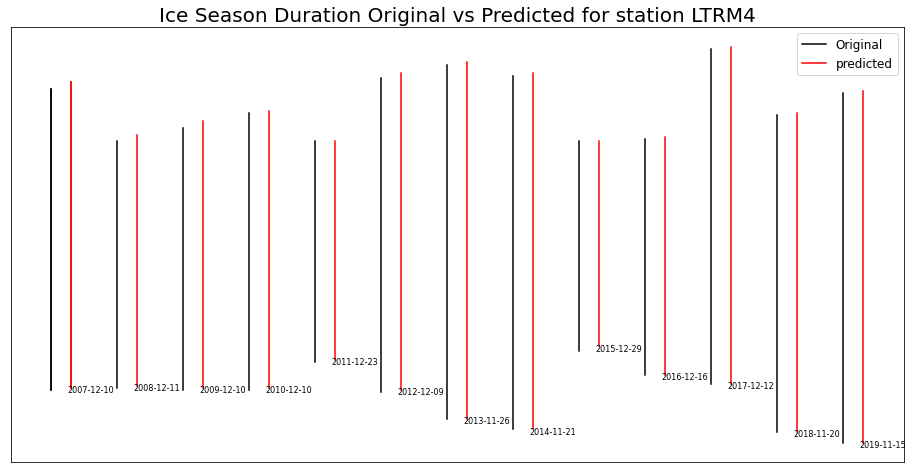

In [55]:
# Draw the Ice-on and Ice-off plots


df_original = df_actual_ice
df = df_predicted_ice

xValue_original = []
yValue_original = []
xValue = []
yValue = []
tick_spacing = 5

for i in range(1,len(df_original['year'])):
    if(int(df_original['Ice_off_date'][i].strftime("%m")) < 11):
        xValue_original.append(df_original['year'][i])
        xValue_original.append(df_original['year'][i])
    else:
        xValue_original.append(df_original['year'][i]+1)
        xValue_original.append(df_original['year'][i]+1)

for i in range(1,len(df['year'])):
    if(int(df['Ice_off_date'][i].strftime("%m")) < 11):
        xValue.append(df['year'][i])
        xValue.append(df['year'][i])
    else:
        xValue.append(df['year'][i]+1)
        xValue.append(df['year'][i]+1)
        
    
for i in range(0,(len(df_original['Ice_off_date'])-1)):
    if(int(df_original['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df_original['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    yValue_original.append((df_original['Ice_on_date'][i]-start_date).days)
    yValue_original.append((df_original['Ice_off_date'][i+1]-start_date).days)

for i in range(0,(len(df['Ice_off_date'])-1)):
    if(int(df['Ice_on_date'][i].strftime("%m")) >= 11):
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y")),11,1,0,0,0)
    else:
        start_date = datetime(int(df['Ice_on_date'][i].strftime("%Y"))-1,11,1,0,0,0)
    yValue.append((df['Ice_on_date'][i]-start_date).days)
    yValue.append((df['Ice_off_date'][i+1]-start_date).days)


      
plt.figure(figsize=(16,8))  

for i in range(0, int(len(xValue)/2)):

    plt.annotate(df['Ice_on_date'][i].strftime("%Y-%m-%d"),(xValue[2*i],yValue[2*i]), xytext=(xValue[2*i]+0.25,yValue[2*i] -2), fontsize=8)
#     plt.annotate(df['Ice_off_date'][i+1].strftime("%Y-%m-%d"),(xValue[2*i+1],yValue[2*i+1]), xytext=(xValue[2*i+1]-0.8,yValue[2*i+1]), fontsize=8)

    

# for i in range(0, int(len(xValue_original)/2)):
#     ice_on_point = plt.scatter(xValue_original[2*i], yValue_original[2*i], color = 'r', s=6. )
#     ice_off_point = plt.scatter(xValue_original[2*i+1], yValue_original[2*i+1], color = 'b', s=6.)
    
# for i in range(0, int(len(xValue)/2)):
#     ice_on_point = plt.scatter(xValue[2*i] + 0.3, yValue[2*i], color = 'y', s=6. )
#     ice_off_point = plt.scatter(xValue[2*i+1] + 0.3, yValue[2*i+1], color = 'g', s=6.)


# l2 = plt.legend([ice_on_point, ice_off_point], labels = ['Ice On Date', 'Ice Off Date'], bbox_to_anchor=(1.05, 0), loc=1, borderaxespad=0)            


    
for i in range(0, int(len(xValue_original)/2)):
    if(i==0):
        line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k', label = 'Original')
        
    line1 = plt.plot([xValue_original[2*i], xValue_original[2*i+1]],[yValue_original[2*i], yValue_original[2*i+1]],  color ='k')

plt.legend()
    #     plt.annotate(df['Ice Duration'][i], ((xValue[2*i]+xValue[2*i+1])/2, (yValue[2*i]+yValue[2*i+1])/2), ((xValue[2*i]+xValue[2*i+1])/2+0.1, (yValue[2*i]+yValue[2*i+1])/2))
    
for j in range(0, int(len(xValue)/2)):
    if(j == 0):
        line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], label = 'predicted', color = 'r')
        
    line2 = plt.plot([xValue[2*j] + 0.3, xValue[2*j+1]+0.3],[yValue[2*j], yValue[2*j+1]], color = 'r')  

plt.legend(loc='upper right', fontsize = 12)
        
    
# plt.legend([line1, line2], labels=['Original', 'Predicted'], bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0)


# plt.gca().add_artist(l2)




plt.title('Ice Season Duration Original vs Predicted for station LTRM4' , fontsize=20)

# plt.axis('off')
plt.yticks([])


frame = plt.gca().axes.get_xaxis().set_visible(False)

plt.savefig('Ice_duration_LTRM4.png')

In [56]:
#df_ml.to_csv('predicted_ice_on_off.csv', index = True)

In [57]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

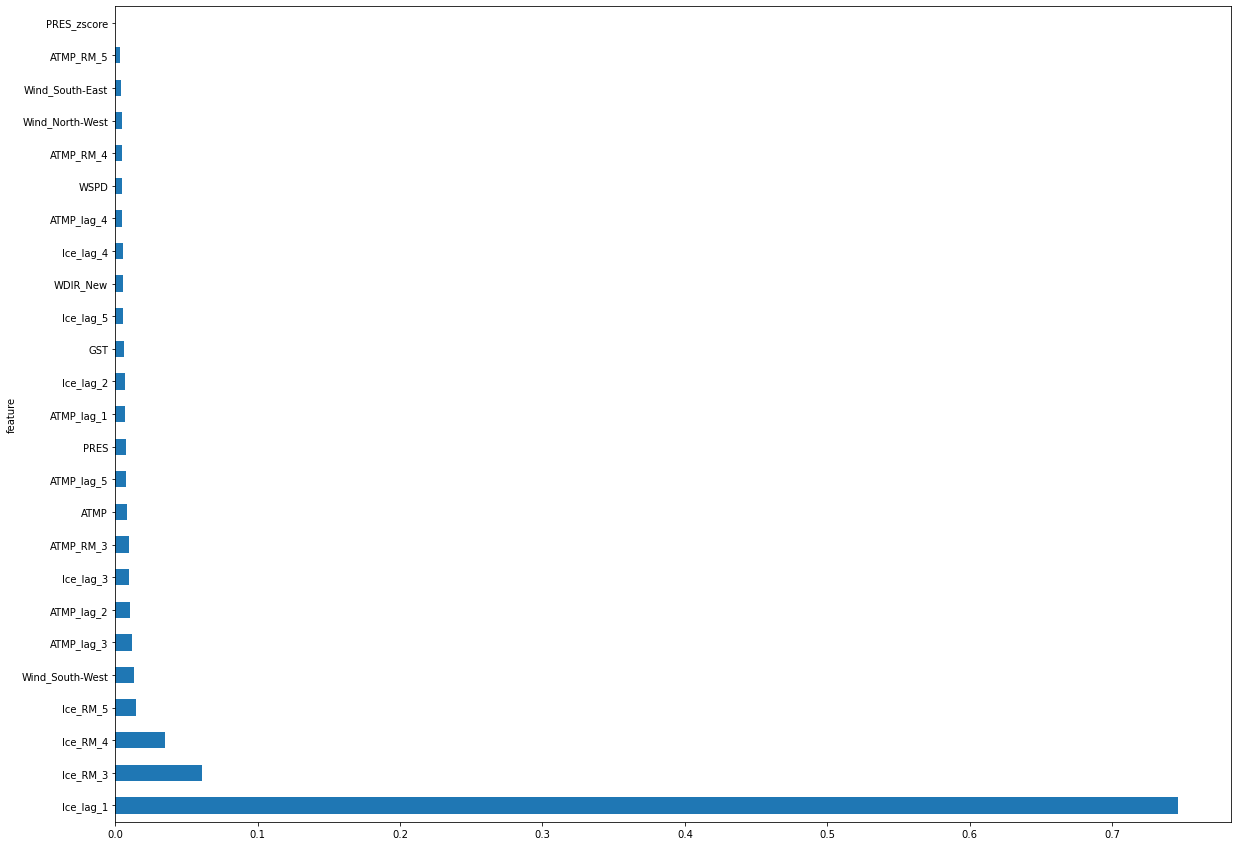

In [58]:
# Displaying the variable importance

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
df_var_imp['importance'].plot(kind = 'barh')

In [59]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.746055
Ice_RM_3           0.061301
Ice_RM_4           0.035062
Ice_RM_5           0.014902
Wind_South-West    0.013180
ATMP_lag_3         0.011775
ATMP_lag_2         0.010823
Ice_lag_3          0.009622
ATMP_RM_3          0.009434
ATMP               0.008317
ATMP_lag_5         0.008005
PRES               0.007497
ATMP_lag_1         0.006981
Ice_lag_2          0.006807
GST                0.005933
Ice_lag_5          0.005862
WDIR_New           0.005732
Ice_lag_4          0.005731
ATMP_lag_4         0.005113
WSPD               0.004912
ATMP_RM_4          0.004702
Wind_North-West    0.004602
Wind_South-East    0.003909
ATMP_RM_5          0.003745
PRES_zscore        0.000000


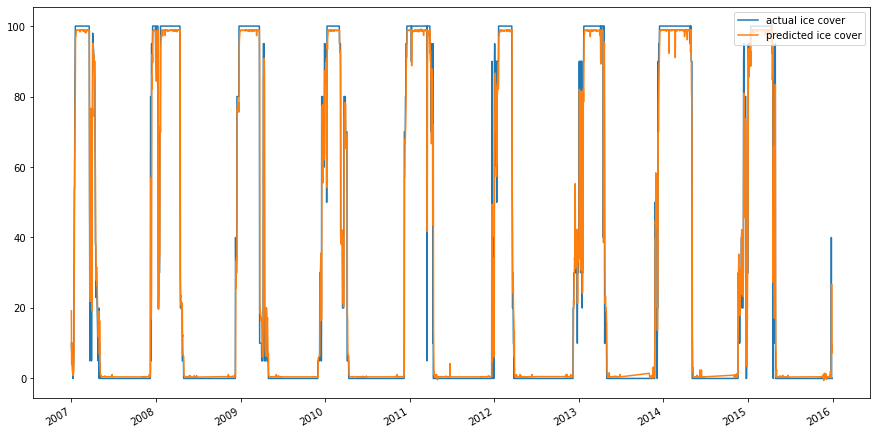

In [60]:
# Overlaying the training predictions on top of training data

plt.figure(figsize=(15,8))
df_train['LTRM'].plot(label = 'actual ice cover')
df_train['LTRM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [61]:
########################## Code for Baseline vs Actual vs Predicted Ice cover #######################

df_plot = pd.concat([df_train, df_test, df_valid], axis = 0)
df_plot = df_plot.drop(['WSPD', 'GST', 'PRES', 'ATMP', 'LTRM_Pred_RM_3'], axis = 1)
df_plot['year'] = df_plot.index.year
df_plot['month'] = df_plot.index.month
df_plot['day'] = df_plot.index.day

df_plot_2020 = df_plot[df_plot['year'] == 2020]
df_plot_rem = df_plot[df_plot['year'] <= 2019]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['LTRM'].mean().reset_index())
res = res.rename(columns = {'LTRM': 'LTRM_Baseline'})
df_plot_2020_final = df_plot_2020.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2020_final.index = df_plot_2020.index

df_plot_2019 = df_plot[df_plot['year'] == 2019]
df_plot_rem = df_plot[df_plot['year'] <= 2018]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['LTRM'].mean().reset_index())
res = res.rename(columns = {'LTRM': 'LTRM_Baseline'})
df_plot_2019_final = df_plot_2019.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2019_final.index = df_plot_2019.index

df_plot_2018 = df_plot[df_plot['year'] == 2018]
df_plot_rem = df_plot[df_plot['year'] <= 2017]

res = pd.DataFrame(df_plot_rem.groupby(['month', 'day'])['LTRM'].mean().reset_index())
res = res.rename(columns = {'LTRM': 'LTRM_Baseline'})
df_plot_2018_final = df_plot_2018.merge(res, on = ['month', 'day'], how = 'inner')
df_plot_2018_final.index = df_plot_2018.index

df_plot_final = pd.concat([df_plot_2018_final, df_plot_2019_final, df_plot_2020_final], axis = 0)
df_plot_final

,LTRM,LTRM_Pred,year,month,day,LTRM_Baseline
2018-01-01,95.001221,94.293396,2018,1,1,61.817515
2018-01-02,95.001221,92.200844,2018,1,2,72.089453
2018-01-03,95.001221,92.874138,2018,1,3,71.544992
2018-01-04,99.998466,92.857727,2018,1,4,66.816154
2018-01-05,99.998466,98.558792,2018,1,5,74.907473
...,...,...,...,...,...,...
2020-05-19,0.000000,0.403392,2020,5,19,0.000000
2020-05-20,0.000000,0.470385,2020,5,20,0.000000
2020-05-21,0.000000,0.470385,2020,5,21,0.000000
2020-05-22,0.000000,0.470385,2020,5,22,0.000000


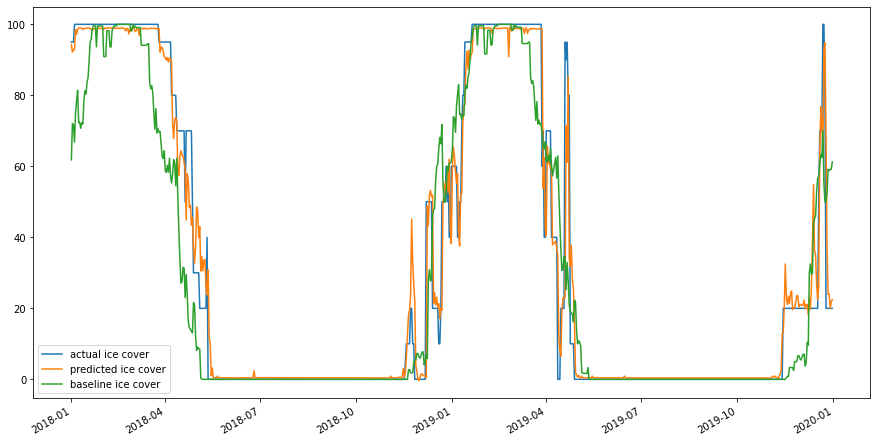

In [62]:
# Overlaying the 2018 and 2019 predictions and baseline on top of actual data

plt.figure(figsize=(15,8))
df_subset_2020 = df_plot_final.loc['2018-01-01':'2020-12-31']
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['LTRM'].plot(label = 'actual ice cover')
df_subset['LTRM_Pred'].plot(label = 'predicted ice cover')
df_subset['LTRM_Baseline'].plot(label = 'baseline ice cover')
plt.legend(loc="lower left")

In [63]:
df_ltrm4_2018_2019 = df_subset_2020

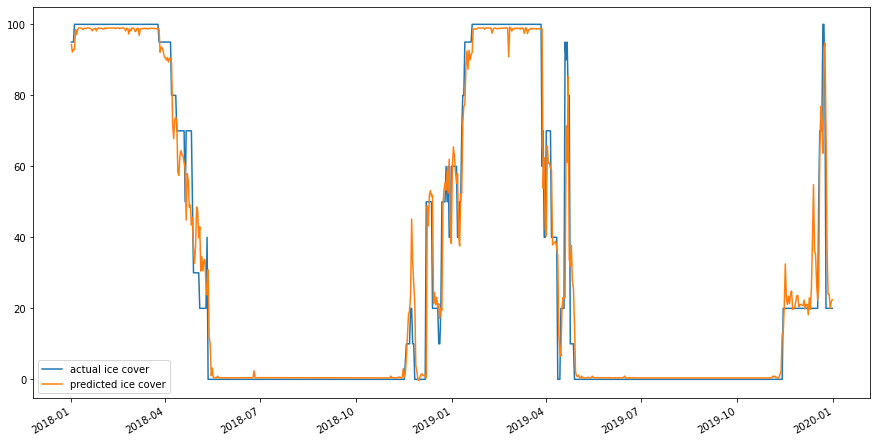

In [64]:
# Overlaying the 2018 and 2019 predictions on top of actual data

plt.figure(figsize=(15,8))
df_subset = df_plot_final.loc['2018-01-01':'2019-12-31']
df_subset['LTRM'].plot(label = 'actual ice cover')
df_subset['LTRM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="lower left")

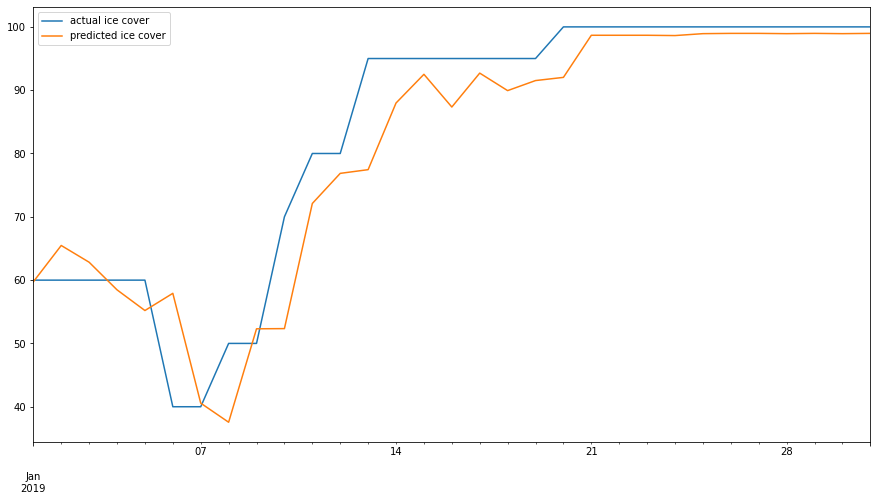

In [65]:
# Overlaying January 2019 predictions on top of actual data for January 2019

plt.figure(figsize=(15,8))
df_subset = df_test.loc['2019-01-01':'2019-01-31']
df_subset['LTRM'].plot(label = 'actual ice cover')
df_subset['LTRM_Pred'].plot(label = 'predicted ice cover')
plt.legend(loc="upper left")

In [66]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-02-01 as the split date

split_date = '2019-02-01'

df_merge_1 = df_merge[['LTRM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5',  
                      'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_merge_train = df_merge_1.loc[df_merge.index < split_date].copy()
df_merge_test = df_merge_1.loc[df_merge.index == split_date].copy()

X_train = df_merge_train.drop(['LTRM'], axis = 1)
X_test = df_merge_test.drop(['LTRM'], axis = 1)
y_train = df_merge_train['LTRM']
y_test = df_merge_test['LTRM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(2935, 13) (2935,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.4s finished


0.9329991331802067
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


In [67]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.241684], dtype=float32)

In [68]:
### Actual ice cover on the day of the test data

y_test

2019-02-01    99.998466
Name: LTRM, dtype: float64

In [69]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.7567825317382812


In [70]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [71]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['LTRM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-03 2019-02-03    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-04 2019-02-04    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-05 2019-02-05    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-06 2019-02-06    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-07 2019-02-07    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-08 2019-02-08    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-09 2019-02-09    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-10 2019-02-10    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-11 2019-02-11    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-12 2019-02-12    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-13 2019-02-13    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-14 2019-02-14    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-15 2019-02-15    99.998466
Nam

In [72]:
print(mean_absolute_error(y_test, y_test_pred))

0.7567825317382812


In [73]:
######### Using the predicted value on any date as ground truth and forecasting for next 7 days #################

for i in range(1, 8):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_merge_test = df_merge_1.loc[df_merge.index == res].copy()
    
    y_test = df_merge_test['LTRM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-02-02 2019-02-02    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-03 2019-02-03    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-04 2019-02-04    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-05 2019-02-05    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-06 2019-02-06    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-07 2019-02-07    99.998466
Name: LTRM, dtype: float64 [99.241684]
2019-02-08 2019-02-08    99.998466
Name: LTRM, dtype: float64 [99.241684]


In [74]:
df_merge['year'] = pd.DatetimeIndex(df_merge.index).year
df_merge['month'] = pd.DatetimeIndex(df_merge.index).month
df_merge['day'] = pd.DatetimeIndex(df_merge.index).day
df_merge.head()

,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,...,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,1
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,2
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,3
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1,NaN,...,NaN,NaN,NaN,8.336386,NaN,NaN,NaN,2007,1,4
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1,NaN,...,NaN,NaN,NaN,6.668091,7.501603,NaN,NaN,2007,1,5


In [75]:
########## Freezing Phase: Nov 25 - Jan 30
########## Stable Phase: Jan 31 - Mar 25
########## Melting Phase: Mar 26 - May 30
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_freezing = df_merge[df_merge['month'].isin([11, 12, 1])]
df_freezing = df_freezing[~((df_freezing['month'] == 11) & (df_freezing['day'] < 1))]
df_freezing = df_freezing[~((df_freezing['month'] == 1) & (df_freezing['day'] > 14))]

In [76]:
df_stable = df_merge[df_merge['month'].isin([1, 2, 3])]
df_stable = df_stable[~((df_stable['month'] == 1) & (df_stable['day'] < 15))]
df_stable = df_stable[~((df_stable['month'] == 3) & (df_stable['day'] > 25))]

In [77]:
df_melting = df_merge[df_merge['month'].isin([3, 4, 5])]
df_melting = df_melting[~((df_melting['month'] == 3) & (df_melting['day'] < 26))]
df_melting = df_melting[~((df_melting['month'] == 5) & (df_melting['day'] > 10))]

In [78]:
df_freezing.head()

,WSPD,GST,PRES,ATMP,LTRM,WDIR_New,Wind_North-West,Wind_South-East,Wind_South-West,ATMP_lag_1,ATMP_lag_2,ATMP_lag_3,ATMP_lag_4,ATMP_lag_5,Ice_lag_1,Ice_lag_2,Ice_lag_3,Ice_lag_4,Ice_lag_5,ATMP_RM_3,ATMP_RM_4,ATMP_RM_5,Ice_RM_3,Ice_RM_4,Ice_RM_5,PRES_zscore,year,month,day
2007-01-01,5.249367,7.333475,NaN,NaN,10.002140,29.893617,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,1
2007-01-02,3.010042,4.568201,NaN,NaN,8.003235,67.326360,0,0,1,NaN,NaN,NaN,NaN,NaN,10.002140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,2
2007-01-03,3.019915,4.954894,NaN,NaN,7.003784,24.046610,0,0,1,NaN,NaN,NaN,NaN,NaN,8.003235,10.002140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,1,3
2007-01-04,2.611667,3.934583,NaN,NaN,4.997253,1.141667,0,0,1,NaN,NaN,NaN,NaN,NaN,7.003784,8.003235,10.002140,NaN,NaN,NaN,NaN,NaN,8.336386,NaN,NaN,NaN,2007,1,4
2007-01-05,1.951250,2.729167,NaN,NaN,3.997803,21.916667,0,0,1,NaN,NaN,NaN,NaN,NaN,4.997253,7.003784,8.003235,10.00214,NaN,NaN,NaN,NaN,6.668091,7.501603,NaN,NaN,2007,1,5


#### Training XGBoost Model on freezing period ltrm4

In [79]:
# Separating the Independent and dependent variables

X = df_freezing.drop(['LTRM'], axis = 1)
y = df_freezing['LTRM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [80]:
########## Freezing Phase: Dec 01 – Jan 14
########## Stable Phase: Jan 15 – Apr 05
########## Melting Phase: Apr 06 – May 30
X_train = X['2007-11-01':'2015-01-14']
X_test = X['2016-11-01':'2020-01-14']
y_train = y['2007-11-01':'2015-01-14']
y_test = y['2016-11-01':'2020-01-14']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 25) (600,)
(299, 25) (299,)


In [81]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s


0.8034160448814806
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
Time to train = 8.98 seconds


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.8s finished


In [82]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

4.569970780052245


In [83]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

7.176568954229903


In [84]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [85]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [86]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [87]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.517127
Ice_RM_4           0.167530
Ice_RM_3           0.030578
Ice_lag_4          0.026819
Ice_lag_5          0.021541
ATMP_RM_3          0.021301
Ice_RM_5           0.019986
ATMP_RM_5          0.019611
ATMP_RM_4          0.019106
PRES               0.017899
ATMP               0.017220
ATMP_lag_3         0.015416
Wind_South-West    0.014760
Ice_lag_2          0.013617
GST                0.012065
Ice_lag_3          0.011868
ATMP_lag_2         0.010380
ATMP_lag_4         0.009430
WDIR_New           0.009398
ATMP_lag_1         0.008428
WSPD               0.006943
ATMP_lag_5         0.006847
Wind_South-East    0.002128
Wind_North-West    0.000000
PRES_zscore        0.000000


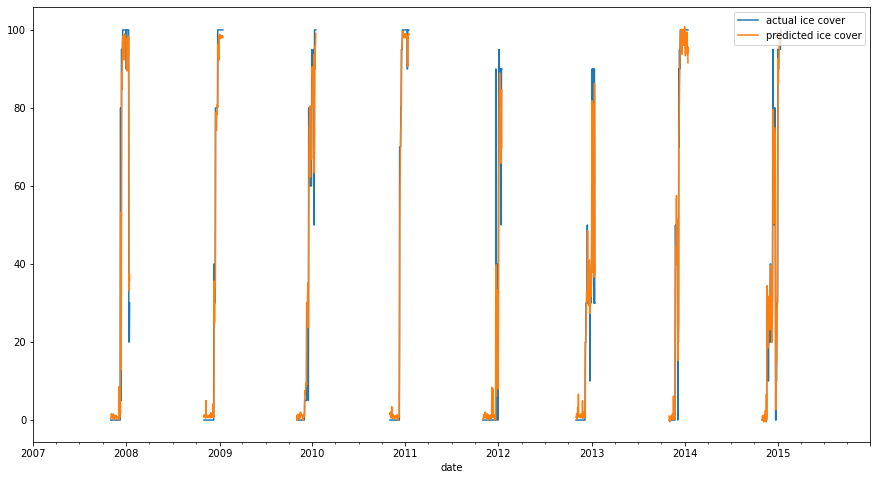

In [88]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'LTRM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['LTRM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['LTRM'].plot(label = 'actual ice cover')
y_train_pred['LTRM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [89]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-01-01 as the 
### test data set.

split_date = '2019-01-01'

df_freeze_1 = df_freezing[['LTRM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_freeze_train = df_freeze_1.loc[df_freezing.index < split_date].copy()
df_freeze_test = df_freeze_1.loc[df_freezing.index == split_date].copy()

X_train = df_freeze_train.drop(['LTRM'], axis = 1)
X_test = df_freeze_test.drop(['LTRM'], axis = 1)
y_train = df_freeze_train['LTRM']
y_test = df_freeze_test['LTRM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(900, 13) (900,)
(1, 13) (1,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s


0.8596743405566769
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.9s finished


In [90]:
### Predict ice cover on the day of the test data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([61.54218], dtype=float32)

In [91]:
### Actual ice cover on the day of the test data

y_test

2019-01-01    59.997559
Name: LTRM, dtype: float64

In [92]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

1.5446205139160156


In [93]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [94]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_freeze_test = df_freeze_1.loc[df_freeze_1.index == res].copy()
    
    y_test = df_freeze_test['LTRM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-01-02 2019-01-02    59.997559
Name: LTRM, dtype: float64 [58.4874]
2019-01-03 2019-01-03    59.997559
Name: LTRM, dtype: float64 [59.802387]
2019-01-04 2019-01-04    59.997559
Name: LTRM, dtype: float64 [61.5197]
2019-01-05 2019-01-05    59.997559
Name: LTRM, dtype: float64 [61.5197]
2019-01-06 2019-01-06    40.000919
Name: LTRM, dtype: float64 [61.5197]
2019-01-07 2019-01-07    40.000919
Name: LTRM, dtype: float64 [61.5197]
2019-01-08 2019-01-08    50.003052
Name: LTRM, dtype: float64 [60.965794]
2019-01-09 2019-01-09    50.003052
Name: LTRM, dtype: float64 [60.965794]
2019-01-10 2019-01-10    69.999687
Name: LTRM, dtype: float64 [60.965794]
2019-01-11 2019-01-11    80.001831
Name: LTRM, dtype: float64 [60.965794]
2019-01-12 2019-01-12    80.001831
Name: LTRM, dtype: float64 [60.965794]
2019-01-13 2019-01-13    95.001221
Name: LTRM, dtype: float64 [61.5197]
2019-01-14 2019-01-14    95.001221
Name: LTRM, dtype: float64 [60.965794]
2019-01-15 Series([], Name: LTRM, dtype: float64) 

#### Training XGBoost Model on stable period ltrm4

In [95]:
# Separating the Independent and dependent variables

X = df_stable.drop(['LTRM'], axis = 1)
y = df_stable['LTRM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [96]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-01-15':'2015-03-25']
X_test = X['2016-01-15':'2020-03-25']
y_train = y['2007-01-15':'2015-03-25']
y_test = y['2016-01-15':'2020-03-25']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(630, 25) (630,)
(352, 25) (352,)


In [97]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.8s


0.5331268701304994
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 17.43 seconds


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   17.2s finished


In [98]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

1.8058313823881604


In [99]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

4.753507110205564


In [100]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [101]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [102]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [103]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.522749
Ice_lag_5          0.057842
Wind_North-West    0.056110
WSPD               0.055875
Ice_lag_2          0.054524
Ice_RM_3           0.044642
Ice_RM_4           0.032091
Ice_lag_4          0.030026
Wind_South-East    0.029907
GST                0.029077
WDIR_New           0.024875
Wind_South-West    0.023946
Ice_RM_5           0.020763
Ice_lag_3          0.017573
ATMP_RM_5          0.000000
ATMP_RM_4          0.000000
ATMP_RM_3          0.000000
ATMP_lag_5         0.000000
ATMP_lag_4         0.000000
ATMP_lag_3         0.000000
ATMP_lag_2         0.000000
ATMP_lag_1         0.000000
ATMP               0.000000
PRES               0.000000
PRES_zscore        0.000000


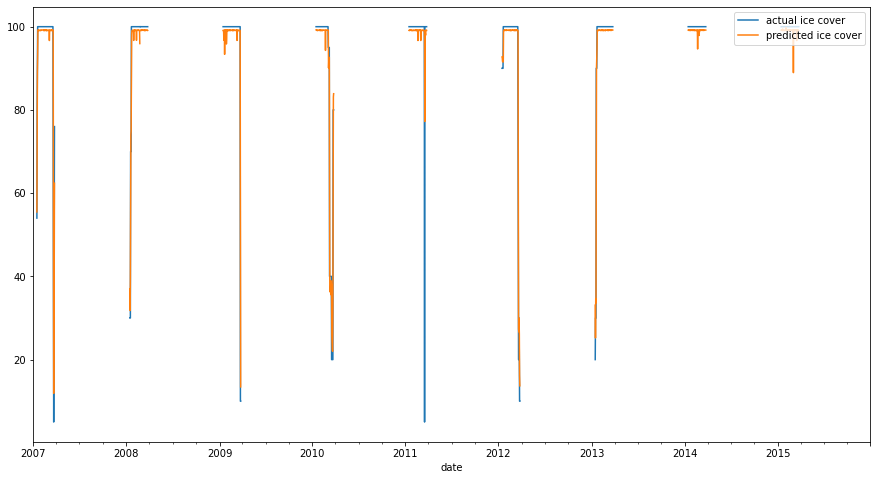

In [104]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'LTRM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['LTRM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['LTRM'].plot(label = 'actual ice cover')
y_train_pred['LTRM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [105]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-03-01 as the 
### test data set.

split_date = '2019-03-01'

df_stable_1 = df_stable[['LTRM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                         'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                         'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_stable_train = df_stable_1.loc[df_stable_1.index < split_date].copy()
df_stable_test = df_stable_1.loc[df_stable_1.index == split_date].copy()

X_train = df_stable_train.drop(['LTRM'], axis = 1)
X_test = df_stable_test.drop(['LTRM'], axis = 1)
y_train = df_stable_train['LTRM']
y_test = df_stable_test['LTRM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(886, 13) (886,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s


-0.16342732334680327
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   17.7s finished


In [106]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([99.170265], dtype=float32)

In [107]:
### Actual ice cover on the day of the testation data

y_test

2019-03-01    99.998466
Name: LTRM, dtype: float64

In [108]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

0.8282012939453125


In [109]:
X_test

,Ice_lag_1,Ice_RM_3,Ice_RM_4,Ice_RM_5,ATMP_RM_4,ATMP_RM_3,ATMP_RM_5,Ice_lag_2,ATMP_lag_4,ATMP,Ice_lag_3,Ice_lag_4,Ice_lag_5
2019-03-01,99.998466,99.998466,99.998466,99.998466,-12.351926,-13.566469,-9.960671,99.998466,-8.708297,-9.220588,99.998466,99.998466,99.998466


In [110]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_stable_test = df_stable_1.loc[df_stable_1.index == res].copy()
    
    y_test = df_stable_test['LTRM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-03-02 2019-03-02    99.998466
Name: LTRM, dtype: float64 [99.170265]
2019-03-03 2019-03-03    99.998466
Name: LTRM, dtype: float64 [99.170265]
2019-03-04 2019-03-04    99.998466
Name: LTRM, dtype: float64 [99.170265]
2019-03-05 2019-03-05    99.998466
Name: LTRM, dtype: float64 [98.924545]
2019-03-06 2019-03-06    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-07 2019-03-07    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-08 2019-03-08    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-09 2019-03-09    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-10 2019-03-10    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-11 2019-03-11    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-12 2019-03-12    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-13 2019-03-13    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-14 2019-03-14    99.998466
Name: LTRM, dtype: float64 [97.62103]
2019-03-15 2019-03-15    99.998466
Name: LTRM, 

In [111]:
y_test

2019-03-15    99.998466
Name: LTRM, dtype: float64

#### Training XGBoost Model on melting period ltrm4

In [112]:
# Separating the Independent and dependent variables

X = df_melting.drop(['LTRM'], axis = 1)
y = df_melting['LTRM']

X = X.drop(['year', 'month', 'day'], axis = 1)

In [113]:
########## Freezing Phase: Nov 01 – Jan 14
########## Stable Phase: Jan 15 – Mar 25
########## Melting Phase: Mar 26 – May 10
X_train = X['2007-03-26':'2015-05-10']
X_test = X['2016-03-26':'2020-05-10']
y_train = y['2007-03-26':'2015-05-10']
y_test = y['2016-03-26':'2020-05-10']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(414, 25) (414,)
(228, 25) (228,)


In [114]:
# Running the XGBoost regressor with a wide range of hyper parameters and 5 CV timeseries splits

t0 = time.time()

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.8],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

tF = time.time()

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print('Time to train = %.2f seconds' % (tF - t0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   19.7s finished


0.20706258978010333
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.8}
Time to train = 20.10 seconds


In [115]:
# Predicting on the training data and calculating the mean absolute error

y_train_pred = xgb_grid.predict(X_train)

print(mean_absolute_error(y_train, y_train_pred))

8.340353137053153


In [116]:
# Predicting on the testation data and calculating the mean absolute error

y_test_pred = xgb_grid.predict(X_test)
y_test_pred[y_test_pred < 0] = 0

print(mean_absolute_error(y_test, y_test_pred))

14.89105808682609


In [117]:
df_train = X_train.copy()
df_train['y_train'] = y_train
df_train['y_train_pred'] = y_train_pred

df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

In [118]:
# Calculating variable importance as per the XGBoost model.

var_importance = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_)
features = pd.DataFrame(X_test.columns)
df_var_imp = pd.concat([features, var_importance], axis = 1)
df_var_imp.columns = ['feature', 'importance']
df_var_imp = df_var_imp.sort_values(by = ['importance'], ascending = False)
df_var_imp = df_var_imp.set_index(['feature'])

In [119]:
# Displaying the variable importance

#%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 15))
#plt.figure(figsize=(10,10))
#df_var_imp['importance'].plot(kind = 'barh')

In [120]:
print(df_var_imp)

                 importance
feature                    
Ice_lag_1          0.390743
Ice_RM_4           0.131990
Ice_RM_3           0.081221
ATMP_lag_4         0.035314
Ice_RM_5           0.034022
ATMP_RM_5          0.031956
ATMP_lag_1         0.029270
PRES_zscore        0.028630
ATMP_lag_3         0.028365
Ice_lag_2          0.027000
ATMP_RM_3          0.025373
Ice_lag_4          0.021790
Ice_lag_5          0.021200
ATMP_lag_2         0.019424
ATMP_lag_5         0.017532
PRES               0.015950
ATMP               0.014644
GST                0.012666
WDIR_New           0.010292
WSPD               0.009450
Ice_lag_3          0.007421
Wind_South-West    0.002718
Wind_South-East    0.002249
Wind_North-West    0.000780
ATMP_RM_4          0.000000


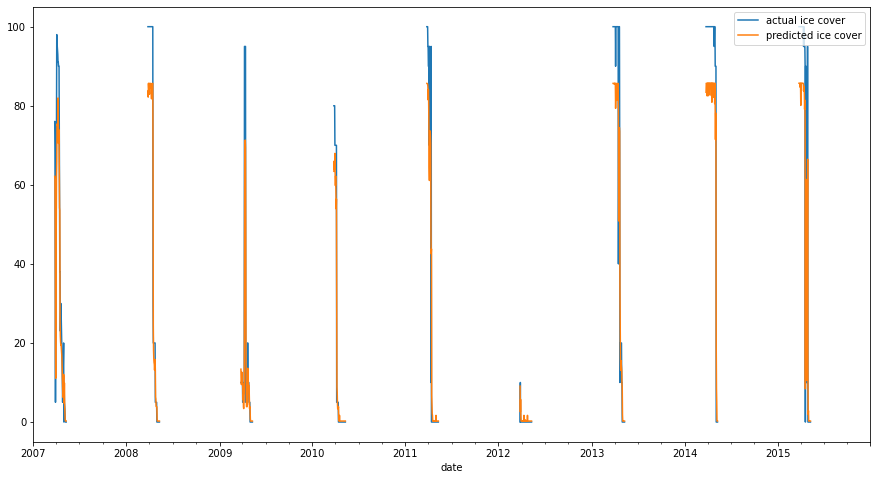

In [121]:
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()
y_train.columns = ['date', 'LTRM']

y_train_pred = pd.DataFrame(y_train_pred)
y_train_pred['date'] = y_train['date']
y_train_pred.columns = ['LTRM', 'date']

from datetime import datetime
df_date = pd.DataFrame(pd.date_range(start="2007-01-01",end="2015-12-31"))
df_date.columns = ['date']

y_train = pd.merge(df_date, y_train, on = 'date', how = 'outer')

y_train_pred = pd.merge(df_date, y_train_pred, on = 'date', how = 'outer')
y_train_pred

# Overlaying the training predictions on top of training data
plt.figure(figsize=(15,8))

y_train = y_train.set_index('date')
y_train_pred = y_train_pred.set_index('date')
y_train['LTRM'].plot(label = 'actual ice cover')
y_train_pred['LTRM'].plot(label = 'predicted ice cover')
plt.legend(loc="upper right")

In [122]:
### XGBoost model to forecast the ice for the next 14 days. Here we select 2019-04-20 as the test data set.

split_date = '2019-04-20'

df_melting_1 = df_melting[['LTRM', 'Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 
                           'ATMP_RM_4', 'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 
                           'ATMP', 'Ice_lag_3','Ice_lag_4', 'Ice_lag_5']]

df_melting_train = df_melting_1.loc[df_melting_1.index < split_date].copy()
df_melting_test = df_melting_1.loc[df_melting_1.index == split_date].copy()

X_train = df_melting_train.drop(['LTRM'], axis = 1)
X_test = df_melting_test.drop(['LTRM'], axis = 1)
y_train = df_melting_train['LTRM']
y_test = df_melting_test['LTRM']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': [3, 4],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [1.0, 0.6],
              'n_estimators': [100, 200]}

tscv = TimeSeriesSplit(n_splits=5)

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        cv = tscv,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

(575, 13) (575,)
(1, 13) (1,)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.4s


0.7721984820057817
{'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   17.2s finished


In [123]:
### Predict ice cover on the day of the testation data

y_test_pred = xgb_grid.predict(X_test)

y_test_pred

array([69.112434], dtype=float32)

In [124]:
### Actual ice cover on the day of the testation data

y_test

2019-04-20    89.996338
Name: LTRM, dtype: float64

In [125]:
## calculating the mean absolute error

print(mean_absolute_error(y_test, y_test_pred))

20.88390350341797


In [126]:
X_test.columns

Index(['Ice_lag_1', 'Ice_RM_3', 'Ice_RM_4', 'Ice_RM_5', 'ATMP_RM_4',
       'ATMP_RM_3', 'ATMP_RM_5', 'Ice_lag_2', 'ATMP_lag_4', 'ATMP',
       'Ice_lag_3', 'Ice_lag_4', 'Ice_lag_5'],
      dtype='object')

In [127]:
######### Using the predicted value on any date as ground truth and forecasting for next 14 days #################

for i in range(1, 15):
    X_test['Ice_lag_5'] = X_test['Ice_lag_4']
    X_test['Ice_lag_4'] = X_test['Ice_lag_3']
    X_test['Ice_lag_3'] = X_test['Ice_lag_2']
    X_test['Ice_lag_2'] = X_test['Ice_lag_1']
    X_test['Ice_lag_1'] = y_test_pred
    
    X_test['Ice_RM_3'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3']])
    X_test['Ice_RM_4'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], X_test['Ice_lag_4']])
    X_test['Ice_RM_5'] = np.mean([X_test['Ice_lag_1'], X_test['Ice_lag_2'], X_test['Ice_lag_3'], 
                              X_test['Ice_lag_4'], X_test['Ice_lag_5']])
    
    res = (datetime.strptime(split_date, '%Y-%m-%d') + timedelta(days=i)).strftime('%Y-%m-%d')
    
    df_melting_test = df_melting_1.loc[df_melting_1.index == res].copy()
    
    y_test = df_melting_test['LTRM']
    
    y_test_pred = xgb_grid.predict(X_test)
    
    print(res, y_test, y_test_pred)

2019-04-21 2019-04-21    95.001221
Name: LTRM, dtype: float64 [51.8604]
2019-04-22 2019-04-22    80.001831
Name: LTRM, dtype: float64 [47.906273]
2019-04-23 2019-04-23    80.001831
Name: LTRM, dtype: float64 [42.08607]
2019-04-24 2019-04-24    10.00214
Name: LTRM, dtype: float64 [31.808884]
2019-04-25 2019-04-25    10.00214
Name: LTRM, dtype: float64 [28.944345]
2019-04-26 2019-04-26    10.00214
Name: LTRM, dtype: float64 [30.62959]
2019-04-27 2019-04-27    10.00214
Name: LTRM, dtype: float64 [30.62959]
2019-04-28 2019-04-28    0.0
Name: LTRM, dtype: float64 [30.168253]
2019-04-29 2019-04-29    0.0
Name: LTRM, dtype: float64 [28.964394]
2019-04-30 2019-04-30    0.0
Name: LTRM, dtype: float64 [28.964394]
2019-05-01 2019-05-01    0.0
Name: LTRM, dtype: float64 [28.964394]
2019-05-02 2019-05-02    0.0
Name: LTRM, dtype: float64 [28.964394]
2019-05-03 2019-05-03    0.0
Name: LTRM, dtype: float64 [28.964394]
2019-05-04 2019-05-04    0.0
Name: LTRM, dtype: float64 [28.964394]


In [128]:
df_ltrm4_2018_2019.head()

,LTRM,LTRM_Pred,year,month,day,LTRM_Baseline
2018-01-01,95.001221,94.293396,2018,1,1,61.817515
2018-01-02,95.001221,92.200844,2018,1,2,72.089453
2018-01-03,95.001221,92.874138,2018,1,3,71.544992
2018-01-04,99.998466,92.857727,2018,1,4,66.816154
2018-01-05,99.998466,98.558792,2018,1,5,74.907473


In [129]:
df_ltrm4_2018_2019.tail()

,LTRM,LTRM_Pred,year,month,day,LTRM_Baseline
2020-05-19,0.0,0.403392,2020,5,19,0.0
2020-05-20,0.0,0.470385,2020,5,20,0.0
2020-05-21,0.0,0.470385,2020,5,21,0.0
2020-05-22,0.0,0.470385,2020,5,22,0.0
2020-05-23,0.0,0.470385,2020,5,23,0.0


In [130]:
df_ltrm4_2018_2019 = df_ltrm4_2018_2019.drop(['year', 'month', 'day'], axis = 1)

In [131]:
df_ltrm4_2018_2019.head()

,LTRM,LTRM_Pred,LTRM_Baseline
2018-01-01,95.001221,94.293396,61.817515
2018-01-02,95.001221,92.200844,72.089453
2018-01-03,95.001221,92.874138,71.544992
2018-01-04,99.998466,92.857727,66.816154
2018-01-05,99.998466,98.558792,74.907473


In [132]:
df_ltrm4_2018_2019.tail()

,LTRM,LTRM_Pred,LTRM_Baseline
2020-05-19,0.0,0.403392,0.0
2020-05-20,0.0,0.470385,0.0
2020-05-21,0.0,0.470385,0.0
2020-05-22,0.0,0.470385,0.0
2020-05-23,0.0,0.470385,0.0


In [133]:
df_ltrm4_2018_2019.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/LTRM4_2018_2019.csv', index = True, header=True)

In [134]:
df_icedur_pred_ltrm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-05-04,2007-12-10,140 days
1,2008,2008-04-28,2008-12-11,115 days
2,2009,2009-04-05,2009-12-10,122 days
3,2010,2010-04-11,2010-12-10,127 days
4,2011,2011-04-16,2011-12-23,100 days


In [135]:
df_icedur_pred_ltrm4 = df_icedur_pred_ltrm4.drop(['duration'],axis=1)

In [136]:
df_icedur_pred_ltrm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-05-04,2007-12-10
1,2008,2008-04-28,2008-12-11
2,2009,2009-04-05,2009-12-10
3,2010,2010-04-11,2010-12-10
4,2011,2011-04-16,2011-12-23


In [137]:
df_icedur_pred_ltrm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/LTRM4_icedur_pred.csv', index = False, header=True)

In [138]:
df_icedur_act_ltrm4.head()

,year,Ice_off_date,Ice_on_date,duration
0,2007,2007-04-26,2007-12-09,138 days
1,2008,2008-04-25,2008-12-10,113 days
2,2009,2009-04-02,2009-12-09,120 days
3,2010,2010-04-08,2010-12-09,127 days
4,2011,2011-04-15,2011-12-22,101 days


In [139]:
df_icedur_act_ltrm4 = df_icedur_act_ltrm4.drop(['duration'],axis=1)

In [140]:
df_icedur_act_ltrm4.head()

,year,Ice_off_date,Ice_on_date
0,2007,2007-04-26,2007-12-09
1,2008,2008-04-25,2008-12-10
2,2009,2009-04-02,2009-12-09
3,2010,2010-04-08,2010-12-09
4,2011,2011-04-15,2011-12-22


In [141]:
df_icedur_act_ltrm4.to_csv(r'C:/Users/sdavedu/Desktop/XGBoost/LTRM4_icedur_act.csv', index = False, header=True)